# **Import Libraries and Data**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
sns.set_style(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
D = pd.read_csv('Model_Data.csv')
data = D.copy()
data

,customer_id,interaction_type,interaction_outcome,payment_method,payment_status,Transaction_type,TheLastTransDate,Months_Since_Last_Transaction,Target
0,1552,Feedback,Pending,Debit Card,Pending,Refund,2020-01-01,57,0
1,1552,Feedback,Pending,PayPal,Pending,Purchase,2020-01-01,57,0
2,5136,Complaint,Pending,Credit Card,Completed,Purchase,2020-01-02,57,0
3,5653,Feedback,Implemented,Credit Card,Refunded,Refund,2020-01-02,57,0
4,9004,Complaint,Implemented,PayPal,Completed,Purchase,2020-01-02,57,0
...,...,...,...,...,...,...,...,...,...
10184,10043,Feedback,Implemented,Debit Card,Refunded,Refund,2024-10-05,0,1
10185,10043,Feedback,Pending,Credit Card,Pending,Purchase,2024-10-05,0,1
10186,10043,Feedback,Pending,Debit Card,Refunded,Refund,2024-10-05,0,1
10187,7677,Complaint,Pending,Debit Card,Refunded,Purchase,2024-10-05,0,1


# **Take a look at the data**
---

In [5]:
data.head()

,customer_id,interaction_type,interaction_outcome,payment_method,payment_status,Transaction_type,TheLastTransDate,Months_Since_Last_Transaction,Target
0,1552,Feedback,Pending,Debit Card,Pending,Refund,2020-01-01,57,0
1,1552,Feedback,Pending,PayPal,Pending,Purchase,2020-01-01,57,0
2,5136,Complaint,Pending,Credit Card,Completed,Purchase,2020-01-02,57,0
3,5653,Feedback,Implemented,Credit Card,Refunded,Refund,2020-01-02,57,0
4,9004,Complaint,Implemented,PayPal,Completed,Purchase,2020-01-02,57,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10189 entries, 0 to 10188
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    10189 non-null  int64 
 1   interaction_type               10189 non-null  object
 2   interaction_outcome            10189 non-null  object
 3   payment_method                 10189 non-null  object
 4   payment_status                 10189 non-null  object
 5   Transaction_type               10189 non-null  object
 6   TheLastTransDate               10189 non-null  object
 7   Months_Since_Last_Transaction  10189 non-null  int64 
 8   Target                         10189 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 716.5+ KB


In [7]:
data.describe()

,customer_id,Months_Since_Last_Transaction,Target
count,10189.000000,10189.000000,10189.000000
mean,5481.066052,29.088527,0.212582
std,3205.558522,16.536827,0.409155
min,2.000000,0.000000,0.000000
25%,2649.000000,15.000000,0.000000
50%,5446.000000,29.000000,0.000000
75%,8250.000000,43.000000,0.000000
max,11000.000000,57.000000,1.000000


In [8]:
data.select_dtypes(include=['object']).describe()

,interaction_type,interaction_outcome,payment_method,payment_status,Transaction_type,TheLastTransDate
count,10189,10189,10189,10189,10189,10189
unique,3,4,3,3,2,1611
top,Complaint,Implemented,Credit Card,Completed,Refund,2020-07-04
freq,3440,2621,3496,3498,5166,35


In [9]:
data['Target'].value_counts()

Target
0    8023
1    2166
Name: count, dtype: int64

# **Exploratory Data Analysis**
---

**Univariate Analysis**

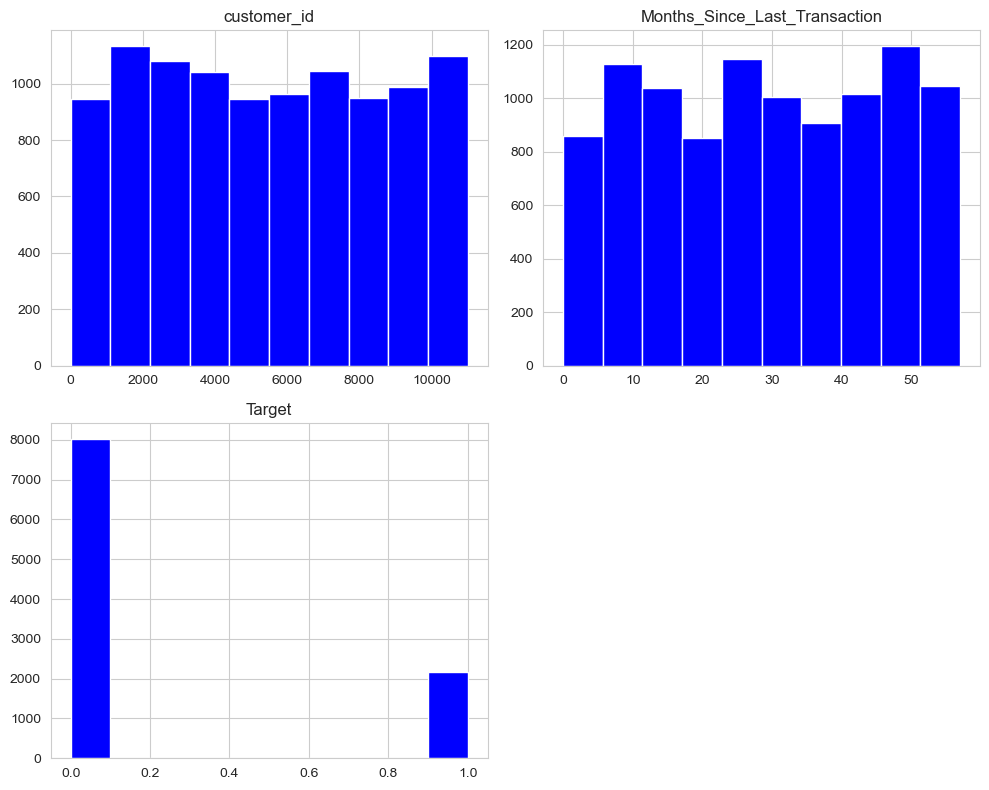

In [10]:
numerical_data = data.select_dtypes(include='number')
numerical_data.hist(figsize=(10, 8),color = 'b')
plt.tight_layout()
plt.show()

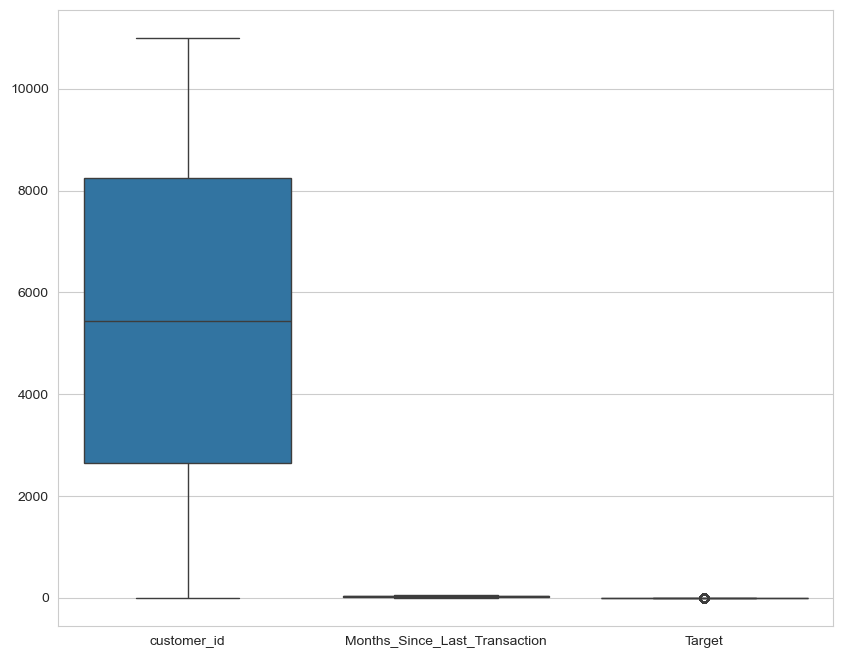

In [11]:
plt.figure(figsize=(10, 8))
sns.boxplot(numerical_data)
plt.show()

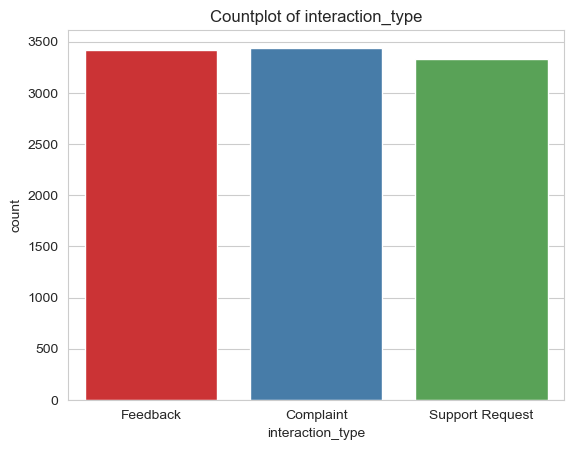

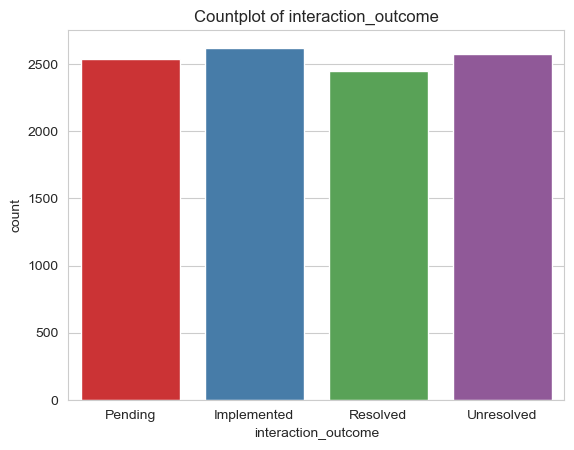

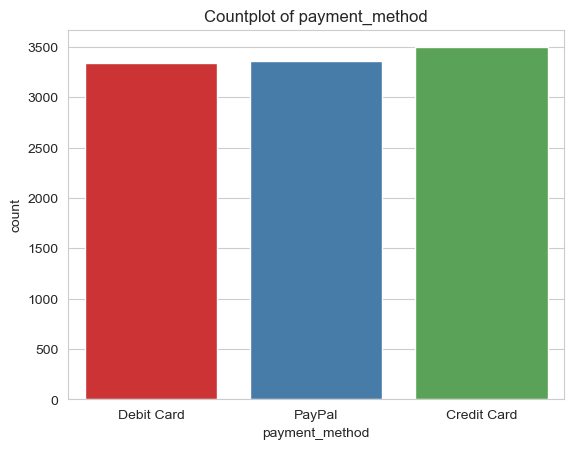

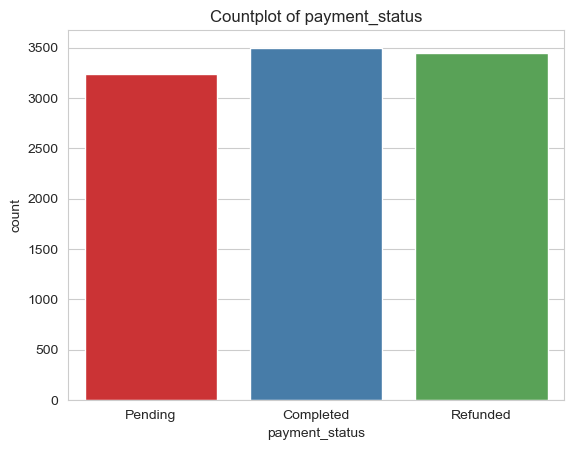

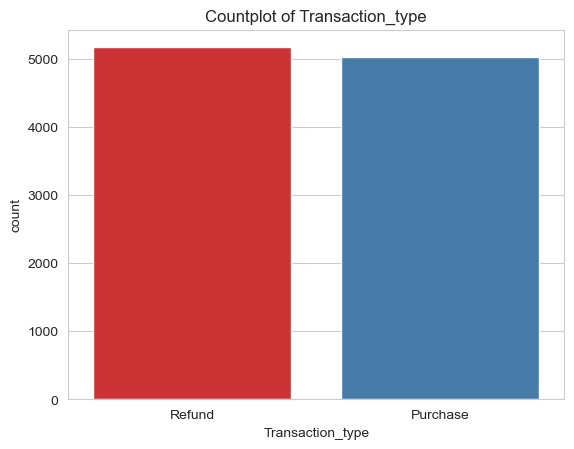

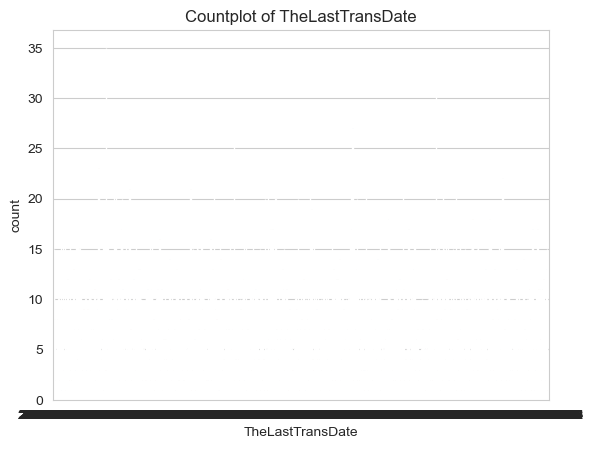

In [12]:
categorical_data = data.select_dtypes(include='object')
for column in categorical_data.columns:
    sns.countplot(data=categorical_data, x=column, palette="Set1")
    plt.title(f"Countplot of {column}")
    plt.show()

**Multivariate Analysis**

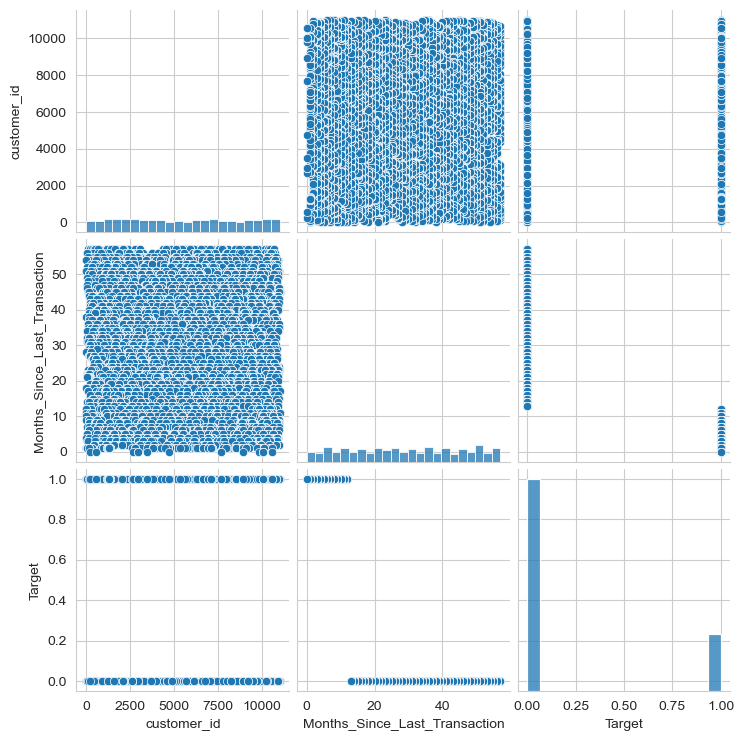

In [13]:
sns.pairplot(data.select_dtypes(include='number'))
plt.show()

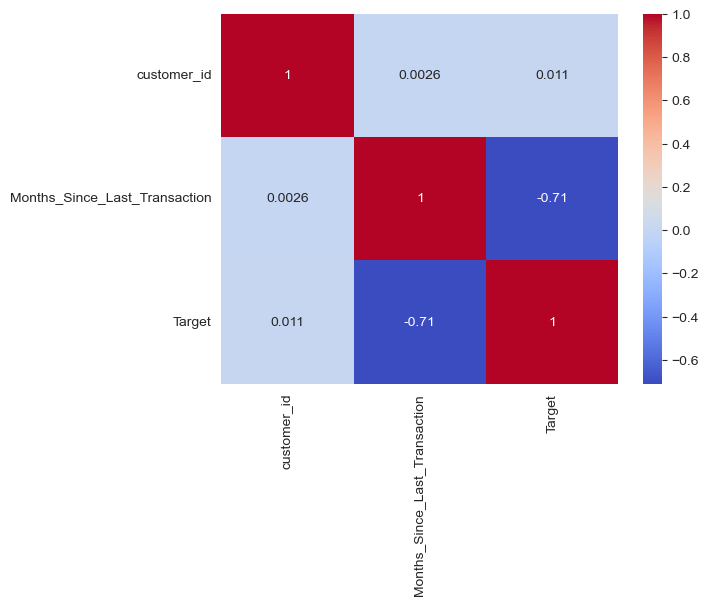

In [14]:
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# **Data Cleaning**
---

**Handling Duplicate Rows**

In [15]:
# Check for duplicate rows
duplicate_rows = data.duplicated()
# Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


**Handling Missing Data**

In [16]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
customer_id,0,0.0
interaction_type,0,0.0
interaction_outcome,0,0.0
payment_method,0,0.0
payment_status,0,0.0
Transaction_type,0,0.0
TheLastTransDate,0,0.0
Months_Since_Last_Transaction,0,0.0
Target,0,0.0


In [17]:
total = data.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


# **Data Preprocessing**
---

**Convert to a datetime format**

In [18]:
data['TheLastTransDate'] = pd.to_datetime(data['TheLastTransDate'])
data['Days_Since_Last_Transaction'] = (pd.Timestamp.now() - data['TheLastTransDate']).dt.days

**Encoding Categorical Variables**

In [19]:
data = pd.get_dummies(data, columns=['interaction_type', 'payment_method', 'payment_status',], drop_first=True)

**Aggregate Transaction Data**

In [20]:
user_agg = data.groupby('customer_id').agg({
    'Transaction_type': lambda x: (x == 'Purchase').sum(),
    'interaction_outcome': lambda x: (x == 'Completed').sum(),
    'Months_Since_Last_Transaction': 'mean',
    'Days_Since_Last_Transaction': 'mean'
}).reset_index()

user_agg.rename(columns={'Transaction_type': 'Total_Purchases',
                          'interaction_outcome': 'Successful_Interactions'}, inplace=True)

# Merge aggregated features back to the original data
data = data.merge(user_agg, on='customer_id', how='left')

In [21]:
data.rename(columns={
    'Months_Since_Last_Transaction_x': 'Months_Since_Last_Transaction',
    'Days_Since_Last_Transaction_x': 'Days_Since_Last_Transaction',
    'Months_Since_Last_Transaction_y': 'Avg_Months_Since_Last_Transaction',
    'Days_Since_Last_Transaction_y': 'Avg_Days_Since_Last_Transaction'
}, inplace=True)

# Drop unnecessary columns
data.drop(columns=['Months_Since_Last_Transaction_y', 'Days_Since_Last_Transaction_y'], inplace=True, errors='ignore')


In [22]:
data.head()

,customer_id,interaction_outcome,Transaction_type,TheLastTransDate,Months_Since_Last_Transaction,Target,Days_Since_Last_Transaction,interaction_type_Feedback,interaction_type_Support Request,payment_method_Debit Card,payment_method_PayPal,payment_status_Pending,payment_status_Refunded,Total_Purchases,Successful_Interactions,Avg_Months_Since_Last_Transaction,Avg_Days_Since_Last_Transaction
0,1552,Pending,Refund,2020-01-01,57,0,1961,True,False,True,False,True,False,1,0,57.0,1961.0
1,1552,Pending,Purchase,2020-01-01,57,0,1961,True,False,False,True,True,False,1,0,57.0,1961.0
2,5136,Pending,Purchase,2020-01-02,57,0,1960,False,False,False,False,False,False,1,0,57.0,1960.0
3,5653,Implemented,Refund,2020-01-02,57,0,1960,True,False,False,False,False,True,0,0,57.0,1960.0
4,9004,Implemented,Purchase,2020-01-02,57,0,1960,False,False,False,True,False,False,2,0,57.0,1960.0


**Data Normalization**

In [23]:
numeric_columns = ['Months_Since_Last_Transaction', 'Days_Since_Last_Transaction', 'Total_Purchases', 'Successful_Interactions']

scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


In [24]:
data = pd.get_dummies(data, columns=['interaction_outcome', 'Transaction_type'], drop_first=True)

In [25]:
data.head()

,customer_id,TheLastTransDate,Months_Since_Last_Transaction,Target,Days_Since_Last_Transaction,interaction_type_Feedback,interaction_type_Support Request,payment_method_Debit Card,payment_method_PayPal,payment_status_Pending,payment_status_Refunded,Total_Purchases,Successful_Interactions,Avg_Months_Since_Last_Transaction,Avg_Days_Since_Last_Transaction,interaction_outcome_Pending,interaction_outcome_Resolved,interaction_outcome_Unresolved,Transaction_type_Refund
0,1552,2020-01-01,1.68792,0,1.716028,True,False,True,False,True,False,-0.403602,0.0,57.0,1961.0,True,False,False,True
1,1552,2020-01-01,1.68792,0,1.716028,True,False,False,True,True,False,-0.403602,0.0,57.0,1961.0,True,False,False,False
2,5136,2020-01-02,1.68792,0,1.714042,False,False,False,False,False,False,-0.403602,0.0,57.0,1960.0,True,False,False,False
3,5653,2020-01-02,1.68792,0,1.714042,True,False,False,False,False,True,-0.926596,0.0,57.0,1960.0,False,False,False,True
4,9004,2020-01-02,1.68792,0,1.714042,False,False,False,True,False,False,0.119392,0.0,57.0,1960.0,False,False,False,False


**Data splitting**

In [26]:
X = data.drop(columns=['Target', 'customer_id'])  # Exclude target and customer ID
y = data['Target']

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**some fixing**

In [28]:
# Assuming 'date_column' is the name of your datetime column in X_train and X_test
for df in [X_train, X_test]:
    # Convert datetime to numeric using timestamp
    if pd.api.types.is_datetime64_any_dtype(df['TheLastTransDate']):
        df['TheLastTransDate'] = df['TheLastTransDate'].view('int64')

    #Alternatively, convert datetime to ordinal
    #df['date_column'] = df['date_column'].apply(lambda date: date.toordinal())

# **Traditional models**
---

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , f1_score

In [30]:
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced')),
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced')),
    ('Random Forest', RandomForestClassifier(random_state=42, class_weight='balanced')),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

In [31]:
for clf_name, clf in classifiers:
        # Fit the model
        clf.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = clf.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        print(f'{clf_name}: F1 Score = {f1*100:.2f}')
        print(f'{clf_name} Classification Report:\n{classification_report(y_test, y_pred)}')
        print('---------------------------------------------------')

Logistic Regression: F1 Score = 35.65
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1596
           1       0.22      1.00      0.36       442

    accuracy                           0.22      2038
   macro avg       0.11      0.50      0.18      2038
weighted avg       0.05      0.22      0.08      2038

---------------------------------------------------
Support Vector Machine: F1 Score = 82.46
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1596
           1       0.70      1.00      0.82       442

    accuracy                           0.91      2038
   macro avg       0.85      0.94      0.88      2038
weighted avg       0.94      0.91      0.91      2038

---------------------------------------------------
Random Forest: F1 Score = 100.00
Random Forest Classification Report:
    